In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/My Drive/EVA5/Week6New/")

In [3]:
import time
!pip install torchsummary
from data.data_loaders.base_data_loader import BaseDataLoader
from utils.misc_utils import get_device_type
from models.networks.mnist_ghost_bn_se import GhostNet
from models.networks.mnist_normal_bn_se import Net
from orchestrators.base_orchestrator import start_training
from data.base_data_utils import get_data_loaders
from configs import basic_config
from models.model_builder import build_model
from utils.visualization_utils import plot_multigraph, plot_misclassified_images
from utils import logger_utils
from torchsummary import summary

In [4]:
logger = logger_utils.get_logger(__name__)

In [5]:
def get_base_model(is_gbn: bool = False): 
  device = get_device_type()
  model = Net().to(device) if is_gbn else GhostNet().to(device)
  return model

In [6]:
train_loader, test_loader = get_data_loaders(dataset_name='mnist')


**** Started Loading data ****

CUDA Available? True
CUDA Available? True
CUDA Available? True

**** Ended Loading data ****



In [7]:
def plot_results(lst_plottingJobs, lst_plottingLegends, title):
  logger.info(f"\nPlotting graph for {title}\n")
  plot_multigraph(lst_plottingJobs,lst_plottingLegends,title)


In [8]:
def print_summary(network,title):
  print(title)
  summary(network,input_size=(1,28,28))

In [9]:
bn_network = get_base_model()
print_summary(bn_network,'Network summary with BatchNormalization')

Network summary with BatchNormalization
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
    GhostBatchNorm-3            [-1, 8, 26, 26]              16
            Conv2d-4           [-1, 16, 24, 24]           1,152
              ReLU-5           [-1, 16, 24, 24]               0
    GhostBatchNorm-6           [-1, 16, 24, 24]              32
         MaxPool2d-7           [-1, 16, 12, 12]               0
            Conv2d-8            [-1, 8, 12, 12]             128
              ReLU-9            [-1, 8, 12, 12]               0
   GhostBatchNorm-10            [-1, 8, 12, 12]              16
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
   GhostBatchNorm-13           [-1, 16, 10, 10]              32

In [10]:
EPOCHS = basic_config.EPOCHS
device = get_device_type()
results = {}

models_dict = {'l1_BN': {'model': get_base_model(), 'l1_lambda':3.994568295536243e-05},
          'l2_BN': {'model': get_base_model(), 'l2_lambda':0.0002871},
          'l1_l2_BN': {'model': get_base_model(), 'l1_lambda':1.4700778484806588e-05, 'l2_lambda':1.4212922008994122e-05},
          'GBN': {'model': get_base_model(is_gbn = True), 'l1_lambda':0, 'l2_lambda':0},
          'l1_l2_GBN': {'model': get_base_model(is_gbn = True), 'l1_lambda':8.283167683030542e-05, 'l2_lambda':9.098971072011508e-05},
          }

lst_plottingJobs_val_acc = []
lst_plottingLegends_val_acc = []
lst_plottingJobs_loss = []
lst_plottingLegends_loss = []

## Training

results = start_training(EPOCHS, device, train_loader, test_loader, **models_dict)

  0%|          | 0/469 [00:00<?, ?it/s]


**** Started training ****


Model: l1_BN

3.994568295536243e-05 0
[EPOCH:0]


Loss=0.12611937522888184 Batch_id=468 Current_train_batch_accuracy=93.05: 100%|██████████| 469/469 [00:14<00:00, 31.35it/s]



Train set: Average loss: 0.1046, Accuracy: 58283/60000 (97.14%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0876, Accuracy: 9760/10000 (97.60%)

best_test_accuracy 97.6
[EPOCH:1]


Loss=0.12467817217111588 Batch_id=468 Current_train_batch_accuracy=97.83: 100%|██████████| 469/469 [00:14<00:00, 32.71it/s]



Train set: Average loss: 0.0680, Accuracy: 58873/60000 (98.12%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0555, Accuracy: 9840/10000 (98.40%)

best_test_accuracy 98.4
[EPOCH:2]


Loss=0.11059096455574036 Batch_id=468 Current_train_batch_accuracy=98.14: 100%|██████████| 469/469 [00:14<00:00, 31.83it/s]



Train set: Average loss: 0.0512, Accuracy: 59174/60000 (98.62%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0420, Accuracy: 9869/10000 (98.69%)

best_test_accuracy 98.69
[EPOCH:3]


Loss=0.07494086027145386 Batch_id=468 Current_train_batch_accuracy=98.30: 100%|██████████| 469/469 [00:14<00:00, 32.50it/s]



Train set: Average loss: 0.0746, Accuracy: 58623/60000 (97.70%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0692, Accuracy: 9790/10000 (97.90%)

best_test_accuracy 98.69
[EPOCH:4]


Loss=0.06932367384433746 Batch_id=468 Current_train_batch_accuracy=98.45: 100%|██████████| 469/469 [00:14<00:00, 32.87it/s]



Train set: Average loss: 0.0533, Accuracy: 59040/60000 (98.40%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0474, Accuracy: 9848/10000 (98.48%)

best_test_accuracy 98.69
[EPOCH:5]


Loss=0.09731189906597137 Batch_id=468 Current_train_batch_accuracy=98.53: 100%|██████████| 469/469 [00:14<00:00, 33.18it/s]



Train set: Average loss: 0.0452, Accuracy: 59248/60000 (98.75%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0403, Accuracy: 9878/10000 (98.78%)

best_test_accuracy 98.78
[EPOCH:6]


Loss=0.07887022942304611 Batch_id=468 Current_train_batch_accuracy=98.60: 100%|██████████| 469/469 [00:14<00:00, 32.52it/s]



Train set: Average loss: 0.0392, Accuracy: 59349/60000 (98.92%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0303, Accuracy: 9913/10000 (99.13%)

best_test_accuracy 99.13
[EPOCH:7]


Loss=0.0797833800315857 Batch_id=468 Current_train_batch_accuracy=98.64: 100%|██████████| 469/469 [00:13<00:00, 33.96it/s]



Train set: Average loss: 0.0431, Accuracy: 59197/60000 (98.66%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0397, Accuracy: 9872/10000 (98.72%)

best_test_accuracy 99.13
[EPOCH:8]


Loss=0.06343039870262146 Batch_id=468 Current_train_batch_accuracy=98.67: 100%|██████████| 469/469 [00:14<00:00, 32.71it/s]



Train set: Average loss: 0.0436, Accuracy: 59227/60000 (98.71%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0352, Accuracy: 9899/10000 (98.99%)

best_test_accuracy 99.13
[EPOCH:9]


Loss=0.07727585732936859 Batch_id=468 Current_train_batch_accuracy=98.75: 100%|██████████| 469/469 [00:13<00:00, 33.90it/s]



Train set: Average loss: 0.0324, Accuracy: 59382/60000 (98.97%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0273, Accuracy: 9915/10000 (99.15%)

best_test_accuracy 99.15
[EPOCH:10]


Loss=0.060249023139476776 Batch_id=468 Current_train_batch_accuracy=98.84: 100%|██████████| 469/469 [00:13<00:00, 33.60it/s]



Train set: Average loss: 0.0403, Accuracy: 59267/60000 (98.78%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0351, Accuracy: 9891/10000 (98.91%)

best_test_accuracy 99.15
[EPOCH:11]


Loss=0.10238292813301086 Batch_id=468 Current_train_batch_accuracy=98.80: 100%|██████████| 469/469 [00:14<00:00, 32.76it/s]



Train set: Average loss: 0.0368, Accuracy: 59340/60000 (98.90%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0300, Accuracy: 9915/10000 (99.15%)

best_test_accuracy 99.15
[EPOCH:12]


Loss=0.09073307365179062 Batch_id=468 Current_train_batch_accuracy=99.11: 100%|██████████| 469/469 [00:14<00:00, 32.22it/s]



Train set: Average loss: 0.0206, Accuracy: 59641/60000 (99.40%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 9927/10000 (99.27%)

best_test_accuracy 99.27
[EPOCH:13]


Loss=0.062226951122283936 Batch_id=468 Current_train_batch_accuracy=99.29: 100%|██████████| 469/469 [00:14<00:00, 32.43it/s]



Train set: Average loss: 0.0205, Accuracy: 59649/60000 (99.42%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 9931/10000 (99.31%)

best_test_accuracy 99.31
[EPOCH:14]


Loss=0.06447344273328781 Batch_id=468 Current_train_batch_accuracy=99.27: 100%|██████████| 469/469 [00:14<00:00, 32.90it/s]



Train set: Average loss: 0.0194, Accuracy: 59676/60000 (99.46%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 9930/10000 (99.30%)

best_test_accuracy 99.31
[EPOCH:15]


Loss=0.06628582626581192 Batch_id=468 Current_train_batch_accuracy=99.25: 100%|██████████| 469/469 [00:14<00:00, 32.71it/s]



Train set: Average loss: 0.0195, Accuracy: 59662/60000 (99.44%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9934/10000 (99.34%)

best_test_accuracy 99.34
[EPOCH:16]


Loss=0.04560726508498192 Batch_id=468 Current_train_batch_accuracy=99.30: 100%|██████████| 469/469 [00:14<00:00, 33.35it/s]



Train set: Average loss: 0.0191, Accuracy: 59683/60000 (99.47%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0209, Accuracy: 9941/10000 (99.41%)

best_test_accuracy 99.41
[EPOCH:17]


Loss=0.1250041276216507 Batch_id=468 Current_train_batch_accuracy=99.25: 100%|██████████| 469/469 [00:14<00:00, 33.20it/s]



Train set: Average loss: 0.0191, Accuracy: 59674/60000 (99.46%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 9935/10000 (99.35%)

best_test_accuracy 99.41
[EPOCH:18]


Loss=0.04021088033914566 Batch_id=468 Current_train_batch_accuracy=99.25: 100%|██████████| 469/469 [00:14<00:00, 32.42it/s]



Train set: Average loss: 0.0180, Accuracy: 59715/60000 (99.53%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 9930/10000 (99.30%)

best_test_accuracy 99.41
[EPOCH:19]


Loss=0.05379701778292656 Batch_id=468 Current_train_batch_accuracy=99.25: 100%|██████████| 469/469 [00:14<00:00, 32.61it/s]



Train set: Average loss: 0.0194, Accuracy: 59683/60000 (99.47%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 9938/10000 (99.38%)

best_test_accuracy 99.41
[EPOCH:20]


Loss=0.041559286415576935 Batch_id=468 Current_train_batch_accuracy=99.31: 100%|██████████| 469/469 [00:13<00:00, 33.61it/s]



Train set: Average loss: 0.0180, Accuracy: 59711/60000 (99.52%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 9934/10000 (99.34%)

best_test_accuracy 99.41
[EPOCH:21]


Loss=0.06230909377336502 Batch_id=468 Current_train_batch_accuracy=99.30: 100%|██████████| 469/469 [00:14<00:00, 32.60it/s]



Train set: Average loss: 0.0194, Accuracy: 59686/60000 (99.48%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0211, Accuracy: 9929/10000 (99.29%)

best_test_accuracy 99.41
[EPOCH:22]


Loss=0.03885745257139206 Batch_id=468 Current_train_batch_accuracy=99.29: 100%|██████████| 469/469 [00:14<00:00, 32.22it/s]



Train set: Average loss: 0.0181, Accuracy: 59697/60000 (99.50%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9941/10000 (99.41%)

best_test_accuracy 99.41
[EPOCH:23]


Loss=0.04126859828829765 Batch_id=468 Current_train_batch_accuracy=99.27: 100%|██████████| 469/469 [00:14<00:00, 32.82it/s]



Train set: Average loss: 0.0176, Accuracy: 59716/60000 (99.53%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9938/10000 (99.38%)

best_test_accuracy 99.41
[EPOCH:24]


Loss=0.06680703163146973 Batch_id=468 Current_train_batch_accuracy=99.41: 100%|██████████| 469/469 [00:13<00:00, 33.51it/s]



Train set: Average loss: 0.0156, Accuracy: 59749/60000 (99.58%)


Test set: Average loss: 0.0178, Accuracy: 9946/10000 (99.46%)

best_test_accuracy 99.46

results : {'l1_BN': [[97.13833333333334, 98.12166666666667, 98.62333333333333, 97.705, 98.4, 98.74666666666667, 98.915, 98.66166666666666, 98.71166666666667, 98.97, 98.77833333333334, 98.9, 99.40166666666667, 99.415, 99.46, 99.43666666666667, 99.47166666666666, 99.45666666666666, 99.525, 99.47166666666666, 99.51833333333333, 99.47666666666667, 99.495, 99.52666666666667, 99.58166666666666], [0.10463557996749878, 0.06804227348168691, 0.05116522669196129, 0.07458283305565516, 0.053268693214654925, 0.045178567064801854, 0.03920871235728264, 0.04313599038720131, 0.0436173558652401, 0.03238449933379889, 0.040310789397358895, 0.0368488279586037, 0.020551322139799596, 0.020470165277769167, 0.01944047815303008, 0.019470447250207266, 0.01912603240311146, 0.019061548917988936, 0.01798103534231583, 0.019355125766744218, 0.018006223362187546, 0.

  0%|          | 0/469 [00:00<?, ?it/s]


Model: l2_BN

0 0.0002871
[EPOCH:0]


Loss=0.10604074597358704 Batch_id=468 Current_train_batch_accuracy=94.12: 100%|██████████| 469/469 [00:14<00:00, 32.54it/s]



Train set: Average loss: 0.0927, Accuracy: 58667/60000 (97.78%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0696, Accuracy: 9847/10000 (98.47%)

best_test_accuracy 98.47
[EPOCH:1]


Loss=0.06282428652048111 Batch_id=468 Current_train_batch_accuracy=97.80: 100%|██████████| 469/469 [00:13<00:00, 33.83it/s]



Train set: Average loss: 0.0937, Accuracy: 58592/60000 (97.65%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0773, Accuracy: 9799/10000 (97.99%)

best_test_accuracy 98.47
[EPOCH:2]


Loss=0.09403884410858154 Batch_id=468 Current_train_batch_accuracy=98.09: 100%|██████████| 469/469 [00:14<00:00, 32.08it/s]



Train set: Average loss: 0.0764, Accuracy: 58875/60000 (98.12%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0637, Accuracy: 9824/10000 (98.24%)

best_test_accuracy 98.47
[EPOCH:3]


Loss=0.06794871389865875 Batch_id=468 Current_train_batch_accuracy=98.41: 100%|██████████| 469/469 [00:14<00:00, 32.71it/s]



Train set: Average loss: 0.0580, Accuracy: 59096/60000 (98.49%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0490, Accuracy: 9863/10000 (98.63%)

best_test_accuracy 98.63
[EPOCH:4]


Loss=0.149677112698555 Batch_id=468 Current_train_batch_accuracy=98.42: 100%|██████████| 469/469 [00:13<00:00, 34.18it/s]



Train set: Average loss: 0.0577, Accuracy: 59139/60000 (98.56%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0469, Accuracy: 9877/10000 (98.77%)

best_test_accuracy 98.77
[EPOCH:5]


Loss=0.03528581187129021 Batch_id=468 Current_train_batch_accuracy=98.39: 100%|██████████| 469/469 [00:13<00:00, 33.98it/s]



Train set: Average loss: 0.0594, Accuracy: 59148/60000 (98.58%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0502, Accuracy: 9880/10000 (98.80%)

best_test_accuracy 98.8
[EPOCH:6]


Loss=0.061810608953237534 Batch_id=468 Current_train_batch_accuracy=98.51: 100%|██████████| 469/469 [00:13<00:00, 33.69it/s]



Train set: Average loss: 0.0607, Accuracy: 59077/60000 (98.46%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0524, Accuracy: 9862/10000 (98.62%)

best_test_accuracy 98.8
[EPOCH:7]


Loss=0.06124959513545036 Batch_id=468 Current_train_batch_accuracy=98.56: 100%|██████████| 469/469 [00:14<00:00, 33.25it/s]



Train set: Average loss: 0.0687, Accuracy: 58956/60000 (98.26%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0566, Accuracy: 9857/10000 (98.57%)

best_test_accuracy 98.8
[EPOCH:8]


Loss=0.022234322503209114 Batch_id=468 Current_train_batch_accuracy=98.56: 100%|██████████| 469/469 [00:13<00:00, 34.32it/s]



Train set: Average loss: 0.0533, Accuracy: 59225/60000 (98.71%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0435, Accuracy: 9886/10000 (98.86%)

best_test_accuracy 98.86
[EPOCH:9]


Loss=0.0909341350197792 Batch_id=468 Current_train_batch_accuracy=98.53: 100%|██████████| 469/469 [00:14<00:00, 32.70it/s]



Train set: Average loss: 0.1000, Accuracy: 58395/60000 (97.33%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0821, Accuracy: 9771/10000 (97.71%)

best_test_accuracy 98.86
[EPOCH:10]


Loss=0.08685091882944107 Batch_id=468 Current_train_batch_accuracy=98.56: 100%|██████████| 469/469 [00:14<00:00, 33.24it/s]



Train set: Average loss: 0.0531, Accuracy: 59306/60000 (98.84%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0452, Accuracy: 9893/10000 (98.93%)

best_test_accuracy 98.93
[EPOCH:11]


Loss=0.047911420464515686 Batch_id=468 Current_train_batch_accuracy=98.67: 100%|██████████| 469/469 [00:13<00:00, 34.43it/s]



Train set: Average loss: 0.0591, Accuracy: 59105/60000 (98.51%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0488, Accuracy: 9871/10000 (98.71%)

best_test_accuracy 98.93
[EPOCH:12]


Loss=0.0747058242559433 Batch_id=468 Current_train_batch_accuracy=99.03: 100%|██████████| 469/469 [00:14<00:00, 32.68it/s]



Train set: Average loss: 0.0304, Accuracy: 59592/60000 (99.32%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0264, Accuracy: 9927/10000 (99.27%)

best_test_accuracy 99.27
[EPOCH:13]


Loss=0.07141020894050598 Batch_id=468 Current_train_batch_accuracy=99.09: 100%|██████████| 469/469 [00:13<00:00, 33.88it/s]



Train set: Average loss: 0.0297, Accuracy: 59598/60000 (99.33%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0271, Accuracy: 9937/10000 (99.37%)

best_test_accuracy 99.37
[EPOCH:14]


Loss=0.02523958869278431 Batch_id=468 Current_train_batch_accuracy=99.08: 100%|██████████| 469/469 [00:14<00:00, 33.04it/s]



Train set: Average loss: 0.0295, Accuracy: 59616/60000 (99.36%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0270, Accuracy: 9931/10000 (99.31%)

best_test_accuracy 99.37
[EPOCH:15]


Loss=0.04639953002333641 Batch_id=468 Current_train_batch_accuracy=99.13: 100%|██████████| 469/469 [00:14<00:00, 33.07it/s]



Train set: Average loss: 0.0293, Accuracy: 59631/60000 (99.39%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0274, Accuracy: 9935/10000 (99.35%)

best_test_accuracy 99.37
[EPOCH:16]


Loss=0.04668554663658142 Batch_id=468 Current_train_batch_accuracy=99.10: 100%|██████████| 469/469 [00:14<00:00, 33.44it/s]



Train set: Average loss: 0.0309, Accuracy: 59617/60000 (99.36%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0287, Accuracy: 9929/10000 (99.29%)

best_test_accuracy 99.37
[EPOCH:17]


Loss=0.049116868525743484 Batch_id=468 Current_train_batch_accuracy=99.15: 100%|██████████| 469/469 [00:14<00:00, 32.42it/s]



Train set: Average loss: 0.0290, Accuracy: 59614/60000 (99.36%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0274, Accuracy: 9935/10000 (99.35%)

best_test_accuracy 99.37
[EPOCH:18]


Loss=0.029623568058013916 Batch_id=468 Current_train_batch_accuracy=99.14: 100%|██████████| 469/469 [00:14<00:00, 32.72it/s]



Train set: Average loss: 0.0291, Accuracy: 59622/60000 (99.37%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0270, Accuracy: 9930/10000 (99.30%)

best_test_accuracy 99.37
[EPOCH:19]


Loss=0.026897922158241272 Batch_id=468 Current_train_batch_accuracy=99.10: 100%|██████████| 469/469 [00:14<00:00, 32.45it/s]



Train set: Average loss: 0.0319, Accuracy: 59597/60000 (99.33%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0305, Accuracy: 9918/10000 (99.18%)

best_test_accuracy 99.37
[EPOCH:20]


Loss=0.013422485440969467 Batch_id=468 Current_train_batch_accuracy=99.13: 100%|██████████| 469/469 [00:14<00:00, 32.55it/s]



Train set: Average loss: 0.0299, Accuracy: 59636/60000 (99.39%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0276, Accuracy: 9935/10000 (99.35%)

best_test_accuracy 99.37
[EPOCH:21]


Loss=0.01861085183918476 Batch_id=468 Current_train_batch_accuracy=99.17: 100%|██████████| 469/469 [00:14<00:00, 31.53it/s]



Train set: Average loss: 0.0299, Accuracy: 59634/60000 (99.39%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0267, Accuracy: 9933/10000 (99.33%)

best_test_accuracy 99.37
[EPOCH:22]


Loss=0.02797005884349346 Batch_id=468 Current_train_batch_accuracy=99.12: 100%|██████████| 469/469 [00:13<00:00, 33.71it/s]



Train set: Average loss: 0.0293, Accuracy: 59615/60000 (99.36%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0277, Accuracy: 9928/10000 (99.28%)

best_test_accuracy 99.37
[EPOCH:23]


Loss=0.07517775148153305 Batch_id=468 Current_train_batch_accuracy=99.09: 100%|██████████| 469/469 [00:14<00:00, 33.33it/s]



Train set: Average loss: 0.0300, Accuracy: 59612/60000 (99.35%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0279, Accuracy: 9932/10000 (99.32%)

best_test_accuracy 99.37
[EPOCH:24]


Loss=0.012094494886696339 Batch_id=468 Current_train_batch_accuracy=99.22: 100%|██████████| 469/469 [00:14<00:00, 33.17it/s]



Train set: Average loss: 0.0251, Accuracy: 59679/60000 (99.47%)


Test set: Average loss: 0.0239, Accuracy: 9938/10000 (99.38%)

best_test_accuracy 99.38

results : {'l1_BN': [[97.13833333333334, 98.12166666666667, 98.62333333333333, 97.705, 98.4, 98.74666666666667, 98.915, 98.66166666666666, 98.71166666666667, 98.97, 98.77833333333334, 98.9, 99.40166666666667, 99.415, 99.46, 99.43666666666667, 99.47166666666666, 99.45666666666666, 99.525, 99.47166666666666, 99.51833333333333, 99.47666666666667, 99.495, 99.52666666666667, 99.58166666666666], [0.10463557996749878, 0.06804227348168691, 0.05116522669196129, 0.07458283305565516, 0.053268693214654925, 0.045178567064801854, 0.03920871235728264, 0.04313599038720131, 0.0436173558652401, 0.03238449933379889, 0.040310789397358895, 0.0368488279586037, 0.020551322139799596, 0.020470165277769167, 0.01944047815303008, 0.019470447250207266, 0.01912603240311146, 0.019061548917988936, 0.01798103534231583, 0.019355125766744218, 0.018006223362187546, 0.

  0%|          | 0/469 [00:00<?, ?it/s]


Model: l1_l2_BN

1.4700778484806588e-05 1.4212922008994122e-05
[EPOCH:0]


Loss=0.07793217897415161 Batch_id=468 Current_train_batch_accuracy=93.35: 100%|██████████| 469/469 [00:13<00:00, 35.25it/s]



Train set: Average loss: 0.1020, Accuracy: 58326/60000 (97.21%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0806, Accuracy: 9773/10000 (97.73%)

best_test_accuracy 97.73
[EPOCH:1]


Loss=0.09330233186483383 Batch_id=468 Current_train_batch_accuracy=97.61: 100%|██████████| 469/469 [00:14<00:00, 33.31it/s]



Train set: Average loss: 0.0609, Accuracy: 59026/60000 (98.38%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0466, Accuracy: 9865/10000 (98.65%)

best_test_accuracy 98.65
[EPOCH:2]


Loss=0.04271736741065979 Batch_id=468 Current_train_batch_accuracy=98.14: 100%|██████████| 469/469 [00:13<00:00, 33.83it/s]



Train set: Average loss: 0.0563, Accuracy: 59034/60000 (98.39%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0497, Accuracy: 9858/10000 (98.58%)

best_test_accuracy 98.65
[EPOCH:3]


Loss=0.1013365164399147 Batch_id=468 Current_train_batch_accuracy=98.27: 100%|██████████| 469/469 [00:13<00:00, 34.97it/s]



Train set: Average loss: 0.0478, Accuracy: 59185/60000 (98.64%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0391, Accuracy: 9876/10000 (98.76%)

best_test_accuracy 98.76
[EPOCH:4]


Loss=0.05501001328229904 Batch_id=468 Current_train_batch_accuracy=98.46: 100%|██████████| 469/469 [00:13<00:00, 35.30it/s]



Train set: Average loss: 0.0456, Accuracy: 59184/60000 (98.64%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0403, Accuracy: 9874/10000 (98.74%)

best_test_accuracy 98.76
[EPOCH:5]


Loss=0.061119988560676575 Batch_id=468 Current_train_batch_accuracy=98.59: 100%|██████████| 469/469 [00:13<00:00, 34.77it/s]



Train set: Average loss: 0.0432, Accuracy: 59245/60000 (98.74%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0361, Accuracy: 9889/10000 (98.89%)

best_test_accuracy 98.89
[EPOCH:6]


Loss=0.0644959807395935 Batch_id=468 Current_train_batch_accuracy=98.59: 100%|██████████| 469/469 [00:13<00:00, 34.92it/s]



Train set: Average loss: 0.0416, Accuracy: 59289/60000 (98.81%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0375, Accuracy: 9887/10000 (98.87%)

best_test_accuracy 98.89
[EPOCH:7]


Loss=0.08163996040821075 Batch_id=468 Current_train_batch_accuracy=98.68: 100%|██████████| 469/469 [00:13<00:00, 35.48it/s]



Train set: Average loss: 0.0469, Accuracy: 59098/60000 (98.50%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0427, Accuracy: 9864/10000 (98.64%)

best_test_accuracy 98.89
[EPOCH:8]


Loss=0.03595292568206787 Batch_id=468 Current_train_batch_accuracy=98.74: 100%|██████████| 469/469 [00:13<00:00, 34.82it/s]



Train set: Average loss: 0.0357, Accuracy: 59381/60000 (98.97%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0316, Accuracy: 9892/10000 (98.92%)

best_test_accuracy 98.92
[EPOCH:9]


Loss=0.037339355796575546 Batch_id=468 Current_train_batch_accuracy=98.83: 100%|██████████| 469/469 [00:13<00:00, 33.86it/s]



Train set: Average loss: 0.0393, Accuracy: 59330/60000 (98.88%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0352, Accuracy: 9886/10000 (98.86%)

best_test_accuracy 98.92
[EPOCH:10]


Loss=0.03540924936532974 Batch_id=468 Current_train_batch_accuracy=98.83: 100%|██████████| 469/469 [00:13<00:00, 35.39it/s]



Train set: Average loss: 0.0486, Accuracy: 59124/60000 (98.54%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0420, Accuracy: 9872/10000 (98.72%)

best_test_accuracy 98.92
[EPOCH:11]


Loss=0.038128457963466644 Batch_id=468 Current_train_batch_accuracy=98.88: 100%|██████████| 469/469 [00:13<00:00, 34.96it/s]



Train set: Average loss: 0.0333, Accuracy: 59408/60000 (99.01%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0294, Accuracy: 9911/10000 (99.11%)

best_test_accuracy 99.11
[EPOCH:12]


Loss=0.05953908711671829 Batch_id=468 Current_train_batch_accuracy=99.15: 100%|██████████| 469/469 [00:13<00:00, 35.46it/s]



Train set: Average loss: 0.0207, Accuracy: 59652/60000 (99.42%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9935/10000 (99.35%)

best_test_accuracy 99.35
[EPOCH:13]


Loss=0.06145528703927994 Batch_id=468 Current_train_batch_accuracy=99.21: 100%|██████████| 469/469 [00:13<00:00, 35.16it/s]



Train set: Average loss: 0.0200, Accuracy: 59669/60000 (99.45%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 9936/10000 (99.36%)

best_test_accuracy 99.36
[EPOCH:14]


Loss=0.047493331134319305 Batch_id=468 Current_train_batch_accuracy=99.28: 100%|██████████| 469/469 [00:13<00:00, 34.22it/s]



Train set: Average loss: 0.0196, Accuracy: 59688/60000 (99.48%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0205, Accuracy: 9932/10000 (99.32%)

best_test_accuracy 99.36
[EPOCH:15]


Loss=0.059495288878679276 Batch_id=468 Current_train_batch_accuracy=99.31: 100%|██████████| 469/469 [00:13<00:00, 34.98it/s]



Train set: Average loss: 0.0194, Accuracy: 59694/60000 (99.49%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 9927/10000 (99.27%)

best_test_accuracy 99.36
[EPOCH:16]


Loss=0.06316700577735901 Batch_id=468 Current_train_batch_accuracy=99.27: 100%|██████████| 469/469 [00:13<00:00, 35.09it/s]



Train set: Average loss: 0.0189, Accuracy: 59701/60000 (99.50%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0215, Accuracy: 9932/10000 (99.32%)

best_test_accuracy 99.36
[EPOCH:17]


Loss=0.032423898577690125 Batch_id=468 Current_train_batch_accuracy=99.30: 100%|██████████| 469/469 [00:13<00:00, 34.39it/s]



Train set: Average loss: 0.0183, Accuracy: 59713/60000 (99.52%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0212, Accuracy: 9933/10000 (99.33%)

best_test_accuracy 99.36
[EPOCH:18]


Loss=0.03807196766138077 Batch_id=468 Current_train_batch_accuracy=99.29: 100%|██████████| 469/469 [00:13<00:00, 35.28it/s]



Train set: Average loss: 0.0188, Accuracy: 59701/60000 (99.50%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9931/10000 (99.31%)

best_test_accuracy 99.36
[EPOCH:19]


Loss=0.041887227445840836 Batch_id=468 Current_train_batch_accuracy=99.31: 100%|██████████| 469/469 [00:13<00:00, 34.61it/s]



Train set: Average loss: 0.0183, Accuracy: 59712/60000 (99.52%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9925/10000 (99.25%)

best_test_accuracy 99.36
[EPOCH:20]


Loss=0.023498956114053726 Batch_id=468 Current_train_batch_accuracy=99.30: 100%|██████████| 469/469 [00:13<00:00, 35.54it/s]



Train set: Average loss: 0.0187, Accuracy: 59708/60000 (99.51%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0210, Accuracy: 9929/10000 (99.29%)

best_test_accuracy 99.36
[EPOCH:21]


Loss=0.04409627616405487 Batch_id=468 Current_train_batch_accuracy=99.33: 100%|██████████| 469/469 [00:13<00:00, 34.81it/s]



Train set: Average loss: 0.0176, Accuracy: 59727/60000 (99.55%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9932/10000 (99.32%)

best_test_accuracy 99.36
[EPOCH:22]


Loss=0.031273335218429565 Batch_id=468 Current_train_batch_accuracy=99.31: 100%|██████████| 469/469 [00:13<00:00, 35.23it/s]



Train set: Average loss: 0.0180, Accuracy: 59725/60000 (99.54%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0211, Accuracy: 9928/10000 (99.28%)

best_test_accuracy 99.36
[EPOCH:23]


Loss=0.06103535741567612 Batch_id=468 Current_train_batch_accuracy=99.33: 100%|██████████| 469/469 [00:12<00:00, 36.24it/s]



Train set: Average loss: 0.0169, Accuracy: 59732/60000 (99.55%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0196, Accuracy: 9929/10000 (99.29%)

best_test_accuracy 99.36
[EPOCH:24]


Loss=0.07336913794279099 Batch_id=468 Current_train_batch_accuracy=99.40: 100%|██████████| 469/469 [00:13<00:00, 34.97it/s]



Train set: Average loss: 0.0161, Accuracy: 59762/60000 (99.60%)


Test set: Average loss: 0.0191, Accuracy: 9934/10000 (99.34%)

best_test_accuracy 99.36

results : {'l1_BN': [[97.13833333333334, 98.12166666666667, 98.62333333333333, 97.705, 98.4, 98.74666666666667, 98.915, 98.66166666666666, 98.71166666666667, 98.97, 98.77833333333334, 98.9, 99.40166666666667, 99.415, 99.46, 99.43666666666667, 99.47166666666666, 99.45666666666666, 99.525, 99.47166666666666, 99.51833333333333, 99.47666666666667, 99.495, 99.52666666666667, 99.58166666666666], [0.10463557996749878, 0.06804227348168691, 0.05116522669196129, 0.07458283305565516, 0.053268693214654925, 0.045178567064801854, 0.03920871235728264, 0.04313599038720131, 0.0436173558652401, 0.03238449933379889, 0.040310789397358895, 0.0368488279586037, 0.020551322139799596, 0.020470165277769167, 0.01944047815303008, 0.019470447250207266, 0.01912603240311146, 0.019061548917988936, 0.01798103534231583, 0.019355125766744218, 0.018006223362187546, 0.

  0%|          | 0/469 [00:00<?, ?it/s]


Model: GBN

0 0
[EPOCH:0]


Loss=0.07271841913461685 Batch_id=468 Current_train_batch_accuracy=94.20: 100%|██████████| 469/469 [00:12<00:00, 36.69it/s]



Train set: Average loss: 0.0970, Accuracy: 58413/60000 (97.36%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0736, Accuracy: 9800/10000 (98.00%)

best_test_accuracy 98.0
[EPOCH:1]


Loss=0.067481629550457 Batch_id=468 Current_train_batch_accuracy=98.03: 100%|██████████| 469/469 [00:13<00:00, 35.84it/s]



Train set: Average loss: 0.0636, Accuracy: 59035/60000 (98.39%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0490, Accuracy: 9862/10000 (98.62%)

best_test_accuracy 98.62
[EPOCH:2]


Loss=0.0760730654001236 Batch_id=468 Current_train_batch_accuracy=98.35: 100%|██████████| 469/469 [00:13<00:00, 35.69it/s]



Train set: Average loss: 0.0549, Accuracy: 59071/60000 (98.45%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0440, Accuracy: 9873/10000 (98.73%)

best_test_accuracy 98.73
[EPOCH:3]


Loss=0.0099778538569808 Batch_id=468 Current_train_batch_accuracy=98.59: 100%|██████████| 469/469 [00:12<00:00, 36.13it/s]



Train set: Average loss: 0.0426, Accuracy: 59272/60000 (98.79%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0355, Accuracy: 9889/10000 (98.89%)

best_test_accuracy 98.89
[EPOCH:4]


Loss=0.09528977423906326 Batch_id=468 Current_train_batch_accuracy=98.67: 100%|██████████| 469/469 [00:12<00:00, 36.40it/s]



Train set: Average loss: 0.0369, Accuracy: 59370/60000 (98.95%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0320, Accuracy: 9906/10000 (99.06%)

best_test_accuracy 99.06
[EPOCH:5]


Loss=0.01868429221212864 Batch_id=468 Current_train_batch_accuracy=98.86: 100%|██████████| 469/469 [00:12<00:00, 36.46it/s]



Train set: Average loss: 0.0401, Accuracy: 59291/60000 (98.82%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0342, Accuracy: 9900/10000 (99.00%)

best_test_accuracy 99.06
[EPOCH:6]


Loss=0.05177317187190056 Batch_id=468 Current_train_batch_accuracy=98.88: 100%|██████████| 469/469 [00:13<00:00, 35.35it/s]



Train set: Average loss: 0.0334, Accuracy: 59397/60000 (99.00%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0298, Accuracy: 9902/10000 (99.02%)

best_test_accuracy 99.06
[EPOCH:7]


Loss=0.026534119620919228 Batch_id=468 Current_train_batch_accuracy=98.95: 100%|██████████| 469/469 [00:12<00:00, 36.33it/s]



Train set: Average loss: 0.0353, Accuracy: 59359/60000 (98.93%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0317, Accuracy: 9900/10000 (99.00%)

best_test_accuracy 99.06
[EPOCH:8]


Loss=0.05407780036330223 Batch_id=468 Current_train_batch_accuracy=99.05: 100%|██████████| 469/469 [00:12<00:00, 36.29it/s]



Train set: Average loss: 0.0296, Accuracy: 59500/60000 (99.17%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0300, Accuracy: 9907/10000 (99.07%)

best_test_accuracy 99.07
[EPOCH:9]


Loss=0.013451527804136276 Batch_id=468 Current_train_batch_accuracy=99.03: 100%|██████████| 469/469 [00:12<00:00, 36.56it/s]



Train set: Average loss: 0.0283, Accuracy: 59544/60000 (99.24%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0269, Accuracy: 9924/10000 (99.24%)

best_test_accuracy 99.24
[EPOCH:10]


Loss=0.04132402688264847 Batch_id=468 Current_train_batch_accuracy=99.11: 100%|██████████| 469/469 [00:12<00:00, 36.18it/s]



Train set: Average loss: 0.0253, Accuracy: 59590/60000 (99.32%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0252, Accuracy: 9927/10000 (99.27%)

best_test_accuracy 99.27
[EPOCH:11]


Loss=0.07734671980142593 Batch_id=468 Current_train_batch_accuracy=99.16: 100%|██████████| 469/469 [00:12<00:00, 36.56it/s]



Train set: Average loss: 0.0236, Accuracy: 59592/60000 (99.32%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0258, Accuracy: 9914/10000 (99.14%)

best_test_accuracy 99.27
[EPOCH:12]


Loss=0.018244225531816483 Batch_id=468 Current_train_batch_accuracy=99.34: 100%|██████████| 469/469 [00:12<00:00, 36.09it/s]



Train set: Average loss: 0.0176, Accuracy: 59710/60000 (99.52%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0211, Accuracy: 9930/10000 (99.30%)

best_test_accuracy 99.3
[EPOCH:13]


Loss=0.015582987107336521 Batch_id=468 Current_train_batch_accuracy=99.43: 100%|██████████| 469/469 [00:13<00:00, 35.29it/s]



Train set: Average loss: 0.0178, Accuracy: 59702/60000 (99.50%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 9936/10000 (99.36%)

best_test_accuracy 99.36
[EPOCH:14]


Loss=0.0034663667902350426 Batch_id=468 Current_train_batch_accuracy=99.44: 100%|██████████| 469/469 [00:13<00:00, 35.89it/s]



Train set: Average loss: 0.0179, Accuracy: 59711/60000 (99.52%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 9930/10000 (99.30%)

best_test_accuracy 99.36
[EPOCH:15]


Loss=0.0014425750123336911 Batch_id=468 Current_train_batch_accuracy=99.45: 100%|██████████| 469/469 [00:13<00:00, 35.39it/s]



Train set: Average loss: 0.0170, Accuracy: 59714/60000 (99.52%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0214, Accuracy: 9929/10000 (99.29%)

best_test_accuracy 99.36
[EPOCH:16]


Loss=0.04048925265669823 Batch_id=468 Current_train_batch_accuracy=99.43: 100%|██████████| 469/469 [00:13<00:00, 36.02it/s]



Train set: Average loss: 0.0163, Accuracy: 59740/60000 (99.57%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0212, Accuracy: 9932/10000 (99.32%)

best_test_accuracy 99.36
[EPOCH:17]


Loss=0.07102689892053604 Batch_id=468 Current_train_batch_accuracy=99.44: 100%|██████████| 469/469 [00:13<00:00, 35.93it/s]



Train set: Average loss: 0.0158, Accuracy: 59756/60000 (99.59%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9931/10000 (99.31%)

best_test_accuracy 99.36
[EPOCH:18]


Loss=0.028148794546723366 Batch_id=468 Current_train_batch_accuracy=99.42: 100%|██████████| 469/469 [00:13<00:00, 35.32it/s]



Train set: Average loss: 0.0157, Accuracy: 59751/60000 (99.58%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 9931/10000 (99.31%)

best_test_accuracy 99.36
[EPOCH:19]


Loss=0.04471246525645256 Batch_id=468 Current_train_batch_accuracy=99.40: 100%|██████████| 469/469 [00:13<00:00, 36.01it/s]



Train set: Average loss: 0.0162, Accuracy: 59734/60000 (99.56%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 9930/10000 (99.30%)

best_test_accuracy 99.36
[EPOCH:20]


Loss=0.018720554187893867 Batch_id=468 Current_train_batch_accuracy=99.44: 100%|██████████| 469/469 [00:14<00:00, 33.44it/s]



Train set: Average loss: 0.0159, Accuracy: 59748/60000 (99.58%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0212, Accuracy: 9933/10000 (99.33%)

best_test_accuracy 99.36
[EPOCH:21]


Loss=0.019659733399748802 Batch_id=468 Current_train_batch_accuracy=99.40: 100%|██████████| 469/469 [00:13<00:00, 35.23it/s]



Train set: Average loss: 0.0159, Accuracy: 59738/60000 (99.56%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0214, Accuracy: 9928/10000 (99.28%)

best_test_accuracy 99.36
[EPOCH:22]


Loss=0.0037689711898565292 Batch_id=468 Current_train_batch_accuracy=99.45: 100%|██████████| 469/469 [00:13<00:00, 35.71it/s]



Train set: Average loss: 0.0152, Accuracy: 59777/60000 (99.63%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0209, Accuracy: 9929/10000 (99.29%)

best_test_accuracy 99.36
[EPOCH:23]


Loss=0.014743351377546787 Batch_id=468 Current_train_batch_accuracy=99.50: 100%|██████████| 469/469 [00:13<00:00, 35.50it/s]



Train set: Average loss: 0.0160, Accuracy: 59761/60000 (99.60%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0210, Accuracy: 9932/10000 (99.32%)

best_test_accuracy 99.36
[EPOCH:24]


Loss=0.026116110384464264 Batch_id=468 Current_train_batch_accuracy=99.50: 100%|██████████| 469/469 [00:13<00:00, 33.69it/s]



Train set: Average loss: 0.0145, Accuracy: 59779/60000 (99.63%)


Test set: Average loss: 0.0211, Accuracy: 9934/10000 (99.34%)

best_test_accuracy 99.36

results : {'l1_BN': [[97.13833333333334, 98.12166666666667, 98.62333333333333, 97.705, 98.4, 98.74666666666667, 98.915, 98.66166666666666, 98.71166666666667, 98.97, 98.77833333333334, 98.9, 99.40166666666667, 99.415, 99.46, 99.43666666666667, 99.47166666666666, 99.45666666666666, 99.525, 99.47166666666666, 99.51833333333333, 99.47666666666667, 99.495, 99.52666666666667, 99.58166666666666], [0.10463557996749878, 0.06804227348168691, 0.05116522669196129, 0.07458283305565516, 0.053268693214654925, 0.045178567064801854, 0.03920871235728264, 0.04313599038720131, 0.0436173558652401, 0.03238449933379889, 0.040310789397358895, 0.0368488279586037, 0.020551322139799596, 0.020470165277769167, 0.01944047815303008, 0.019470447250207266, 0.01912603240311146, 0.019061548917988936, 0.01798103534231583, 0.019355125766744218, 0.018006223362187546, 0.

  0%|          | 0/469 [00:00<?, ?it/s]


Model: l1_l2_GBN

8.283167683030542e-05 9.098971072011508e-05
[EPOCH:0]


Loss=0.11447522789239883 Batch_id=468 Current_train_batch_accuracy=94.00: 100%|██████████| 469/469 [00:13<00:00, 34.59it/s]



Train set: Average loss: 0.0948, Accuracy: 58571/60000 (97.62%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0704, Accuracy: 9836/10000 (98.36%)

best_test_accuracy 98.36
[EPOCH:1]


Loss=0.10125257074832916 Batch_id=468 Current_train_batch_accuracy=97.92: 100%|██████████| 469/469 [00:13<00:00, 34.75it/s]



Train set: Average loss: 0.0869, Accuracy: 58591/60000 (97.65%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0679, Accuracy: 9802/10000 (98.02%)

best_test_accuracy 98.36
[EPOCH:2]


Loss=0.1190539300441742 Batch_id=468 Current_train_batch_accuracy=98.33: 100%|██████████| 469/469 [00:13<00:00, 34.20it/s]



Train set: Average loss: 0.0839, Accuracy: 58538/60000 (97.56%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0732, Accuracy: 9785/10000 (97.85%)

best_test_accuracy 98.36
[EPOCH:3]


Loss=0.10427270829677582 Batch_id=468 Current_train_batch_accuracy=98.42: 100%|██████████| 469/469 [00:13<00:00, 33.82it/s]



Train set: Average loss: 0.0786, Accuracy: 58665/60000 (97.78%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0596, Accuracy: 9828/10000 (98.28%)

best_test_accuracy 98.36
[EPOCH:4]


Loss=0.1242288202047348 Batch_id=468 Current_train_batch_accuracy=98.42: 100%|██████████| 469/469 [00:14<00:00, 32.92it/s]



Train set: Average loss: 0.0627, Accuracy: 58963/60000 (98.27%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0519, Accuracy: 9851/10000 (98.51%)

best_test_accuracy 98.51
[EPOCH:5]


Loss=0.14849954843521118 Batch_id=468 Current_train_batch_accuracy=98.51: 100%|██████████| 469/469 [00:13<00:00, 33.76it/s]



Train set: Average loss: 0.0537, Accuracy: 59095/60000 (98.49%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0466, Accuracy: 9860/10000 (98.60%)

best_test_accuracy 98.6
[EPOCH:6]


Loss=0.10276205837726593 Batch_id=468 Current_train_batch_accuracy=98.46: 100%|██████████| 469/469 [00:14<00:00, 33.17it/s]



Train set: Average loss: 0.0564, Accuracy: 59120/60000 (98.53%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0466, Accuracy: 9867/10000 (98.67%)

best_test_accuracy 98.67
[EPOCH:7]


Loss=0.13612090051174164 Batch_id=468 Current_train_batch_accuracy=98.59: 100%|██████████| 469/469 [00:14<00:00, 32.21it/s]



Train set: Average loss: 0.0543, Accuracy: 59088/60000 (98.48%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0463, Accuracy: 9866/10000 (98.66%)

best_test_accuracy 98.67
[EPOCH:8]


Loss=0.23471593856811523 Batch_id=468 Current_train_batch_accuracy=98.56: 100%|██████████| 469/469 [00:14<00:00, 32.64it/s]



Train set: Average loss: 0.0880, Accuracy: 58472/60000 (97.45%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0727, Accuracy: 9792/10000 (97.92%)

best_test_accuracy 98.67
[EPOCH:9]


Loss=0.10794661939144135 Batch_id=468 Current_train_batch_accuracy=98.53: 100%|██████████| 469/469 [00:14<00:00, 32.53it/s]



Train set: Average loss: 0.0520, Accuracy: 59179/60000 (98.63%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0487, Accuracy: 9865/10000 (98.65%)

best_test_accuracy 98.67
[EPOCH:10]


Loss=0.1047719344496727 Batch_id=468 Current_train_batch_accuracy=98.58: 100%|██████████| 469/469 [00:14<00:00, 32.66it/s]



Train set: Average loss: 0.0670, Accuracy: 58888/60000 (98.15%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0573, Accuracy: 9844/10000 (98.44%)

best_test_accuracy 98.67
[EPOCH:11]


Loss=0.15475068986415863 Batch_id=468 Current_train_batch_accuracy=98.58: 100%|██████████| 469/469 [00:14<00:00, 31.59it/s]



Train set: Average loss: 0.0656, Accuracy: 58897/60000 (98.16%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0543, Accuracy: 9849/10000 (98.49%)

best_test_accuracy 98.67
[EPOCH:12]


Loss=0.0749090239405632 Batch_id=468 Current_train_batch_accuracy=99.14: 100%|██████████| 469/469 [00:14<00:00, 32.05it/s]



Train set: Average loss: 0.0264, Accuracy: 59615/60000 (99.36%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0253, Accuracy: 9923/10000 (99.23%)

best_test_accuracy 99.23
[EPOCH:13]


Loss=0.07380330562591553 Batch_id=468 Current_train_batch_accuracy=99.17: 100%|██████████| 469/469 [00:15<00:00, 30.60it/s]



Train set: Average loss: 0.0258, Accuracy: 59614/60000 (99.36%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0257, Accuracy: 9926/10000 (99.26%)

best_test_accuracy 99.26
[EPOCH:14]


Loss=0.08902303129434586 Batch_id=468 Current_train_batch_accuracy=99.24: 100%|██████████| 469/469 [00:15<00:00, 30.89it/s]



Train set: Average loss: 0.0260, Accuracy: 59624/60000 (99.37%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0250, Accuracy: 9928/10000 (99.28%)

best_test_accuracy 99.28
[EPOCH:15]


Loss=0.08686085790395737 Batch_id=468 Current_train_batch_accuracy=99.25: 100%|██████████| 469/469 [00:14<00:00, 32.43it/s]



Train set: Average loss: 0.0278, Accuracy: 59552/60000 (99.25%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0269, Accuracy: 9916/10000 (99.16%)

best_test_accuracy 99.28
[EPOCH:16]


Loss=0.09650874137878418 Batch_id=468 Current_train_batch_accuracy=99.20: 100%|██████████| 469/469 [00:14<00:00, 32.35it/s]



Train set: Average loss: 0.0267, Accuracy: 59582/60000 (99.30%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0288, Accuracy: 9921/10000 (99.21%)

best_test_accuracy 99.28
[EPOCH:17]


Loss=0.09066794067621231 Batch_id=468 Current_train_batch_accuracy=99.19: 100%|██████████| 469/469 [00:15<00:00, 31.13it/s]



Train set: Average loss: 0.0275, Accuracy: 59595/60000 (99.33%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0266, Accuracy: 9933/10000 (99.33%)

best_test_accuracy 99.33
[EPOCH:18]


Loss=0.08717217296361923 Batch_id=468 Current_train_batch_accuracy=99.19: 100%|██████████| 469/469 [00:14<00:00, 32.57it/s]



Train set: Average loss: 0.0275, Accuracy: 59602/60000 (99.34%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0270, Accuracy: 9927/10000 (99.27%)

best_test_accuracy 99.33
[EPOCH:19]


Loss=0.06140854209661484 Batch_id=468 Current_train_batch_accuracy=99.17: 100%|██████████| 469/469 [00:14<00:00, 31.83it/s]



Train set: Average loss: 0.0257, Accuracy: 59621/60000 (99.37%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0262, Accuracy: 9926/10000 (99.26%)

best_test_accuracy 99.33
[EPOCH:20]


Loss=0.08139543235301971 Batch_id=468 Current_train_batch_accuracy=99.26: 100%|██████████| 469/469 [00:15<00:00, 31.15it/s]



Train set: Average loss: 0.0264, Accuracy: 59609/60000 (99.35%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0264, Accuracy: 9931/10000 (99.31%)

best_test_accuracy 99.33
[EPOCH:21]


Loss=0.09017212688922882 Batch_id=468 Current_train_batch_accuracy=99.10: 100%|██████████| 469/469 [00:15<00:00, 30.64it/s]



Train set: Average loss: 0.0302, Accuracy: 59552/60000 (99.25%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0280, Accuracy: 9912/10000 (99.12%)

best_test_accuracy 99.33
[EPOCH:22]


Loss=0.10370194911956787 Batch_id=468 Current_train_batch_accuracy=99.18: 100%|██████████| 469/469 [00:15<00:00, 31.00it/s]



Train set: Average loss: 0.0305, Accuracy: 59559/60000 (99.27%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0296, Accuracy: 9920/10000 (99.20%)

best_test_accuracy 99.33
[EPOCH:23]


Loss=0.0843958854675293 Batch_id=468 Current_train_batch_accuracy=99.12: 100%|██████████| 469/469 [00:15<00:00, 30.82it/s]



Train set: Average loss: 0.0302, Accuracy: 59516/60000 (99.19%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0307, Accuracy: 9908/10000 (99.08%)

best_test_accuracy 99.33
[EPOCH:24]


Loss=0.0508708618581295 Batch_id=468 Current_train_batch_accuracy=99.35: 100%|██████████| 469/469 [00:14<00:00, 31.67it/s]



Train set: Average loss: 0.0199, Accuracy: 59732/60000 (99.55%)


Test set: Average loss: 0.0215, Accuracy: 9935/10000 (99.35%)

best_test_accuracy 99.35

results : {'l1_BN': [[97.13833333333334, 98.12166666666667, 98.62333333333333, 97.705, 98.4, 98.74666666666667, 98.915, 98.66166666666666, 98.71166666666667, 98.97, 98.77833333333334, 98.9, 99.40166666666667, 99.415, 99.46, 99.43666666666667, 99.47166666666666, 99.45666666666666, 99.525, 99.47166666666666, 99.51833333333333, 99.47666666666667, 99.495, 99.52666666666667, 99.58166666666666], [0.10463557996749878, 0.06804227348168691, 0.05116522669196129, 0.07458283305565516, 0.053268693214654925, 0.045178567064801854, 0.03920871235728264, 0.04313599038720131, 0.0436173558652401, 0.03238449933379889, 0.040310789397358895, 0.0368488279586037, 0.020551322139799596, 0.020470165277769167, 0.01944047815303008, 0.019470447250207266, 0.01912603240311146, 0.019061548917988936, 0.01798103534231583, 0.019355125766744218, 0.018006223362187546, 0.


Plotting graph for Validation accuracy for all jobs


**** Started Plotting multigraph ****



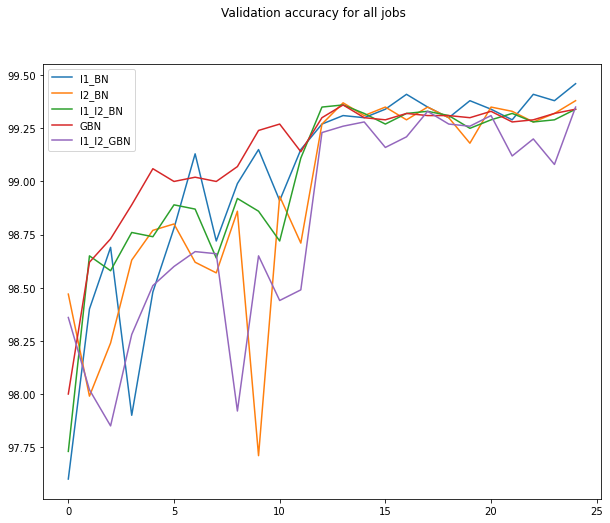


**** Ended Plotting multigraph ****


Plotting graph for Loss curves for all jobs


**** Started Plotting multigraph ****



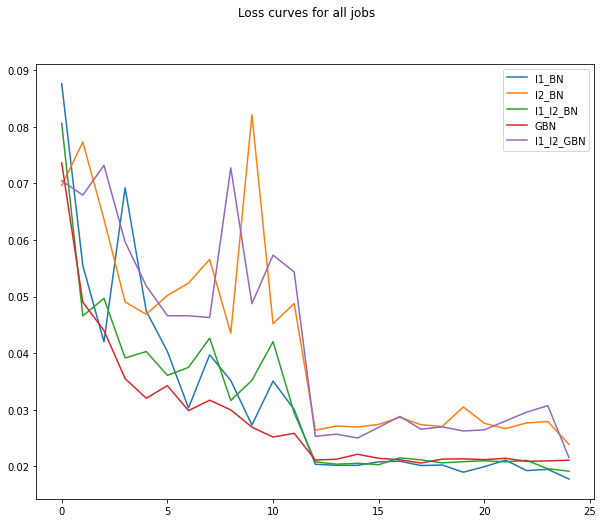


**** Ended Plotting multigraph ****


**** Started plot_misclassified_images ****


**** Ended plot_misclassified_images ****



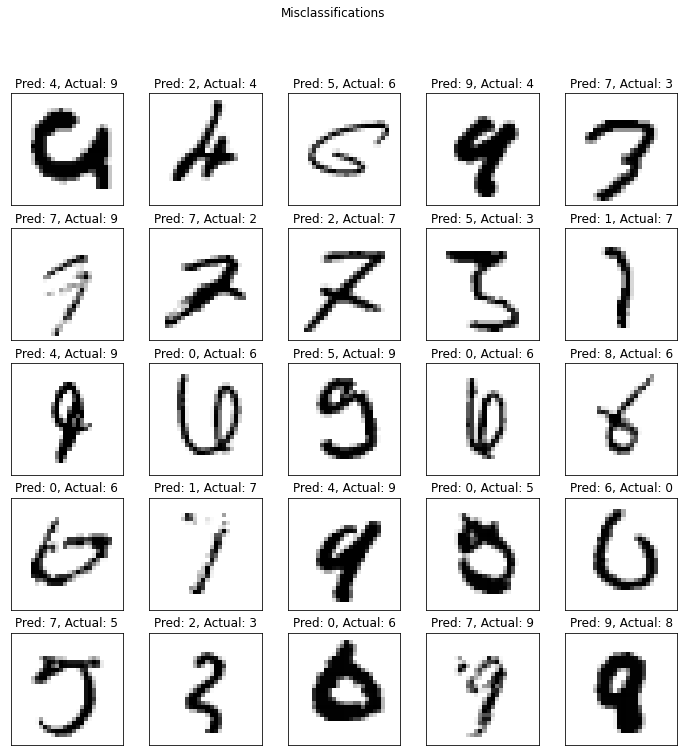

In [11]:
## Plot the results

for model_type in results:
  lst_plottingJobs_val_acc.append(results[model_type][2])
  lst_plottingLegends_val_acc.append(model_type)
  lst_plottingJobs_loss.append(results[model_type][3])
  lst_plottingLegends_loss.append(model_type)

plot_results(lst_plottingJobs_val_acc,lst_plottingLegends_val_acc,title="Validation accuracy for all jobs")
plot_results(lst_plottingJobs_loss,lst_plottingLegends_loss,title="Loss curves for all jobs")

plot_misclassified_images(results['GBN'][4], device, test_loader, num_of_images = 25)